In [1]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

In [6]:
import pandas as pd
df = pd.read_csv('FloodRisk.csv')
k = df.sort_values(by=['Lon', 'Lat'])
X=k.iloc[35000:40000,0:2].values
y=k.iloc[35000:40000,7].values
print(X.shape)
K = np.array([])

(5000, 2)


In [7]:
#RISK LEVEL 1
R1 =  []
for i in range(y.shape[0]):
    if(y[i] == 1):
        R1.append(X[i])
r1 = np.asarray(R1)

#RISK LEVEL 2
R2 =  []
for i in range(y.shape[0]):
    if(y[i] == 2):
        R2.append(X[i])
r2 = np.asarray(R2)

#RISK LEVEL 3
R3 =  []
for i in range(y.shape[0]):
    if(y[i] == 3):
        R3.append(X[i])
r3 = np.asarray(R3)

In [8]:
print(r1.shape)
print(r2.shape)
print(r3.shape)

(604, 2)
(2946, 2)
(1450, 2)


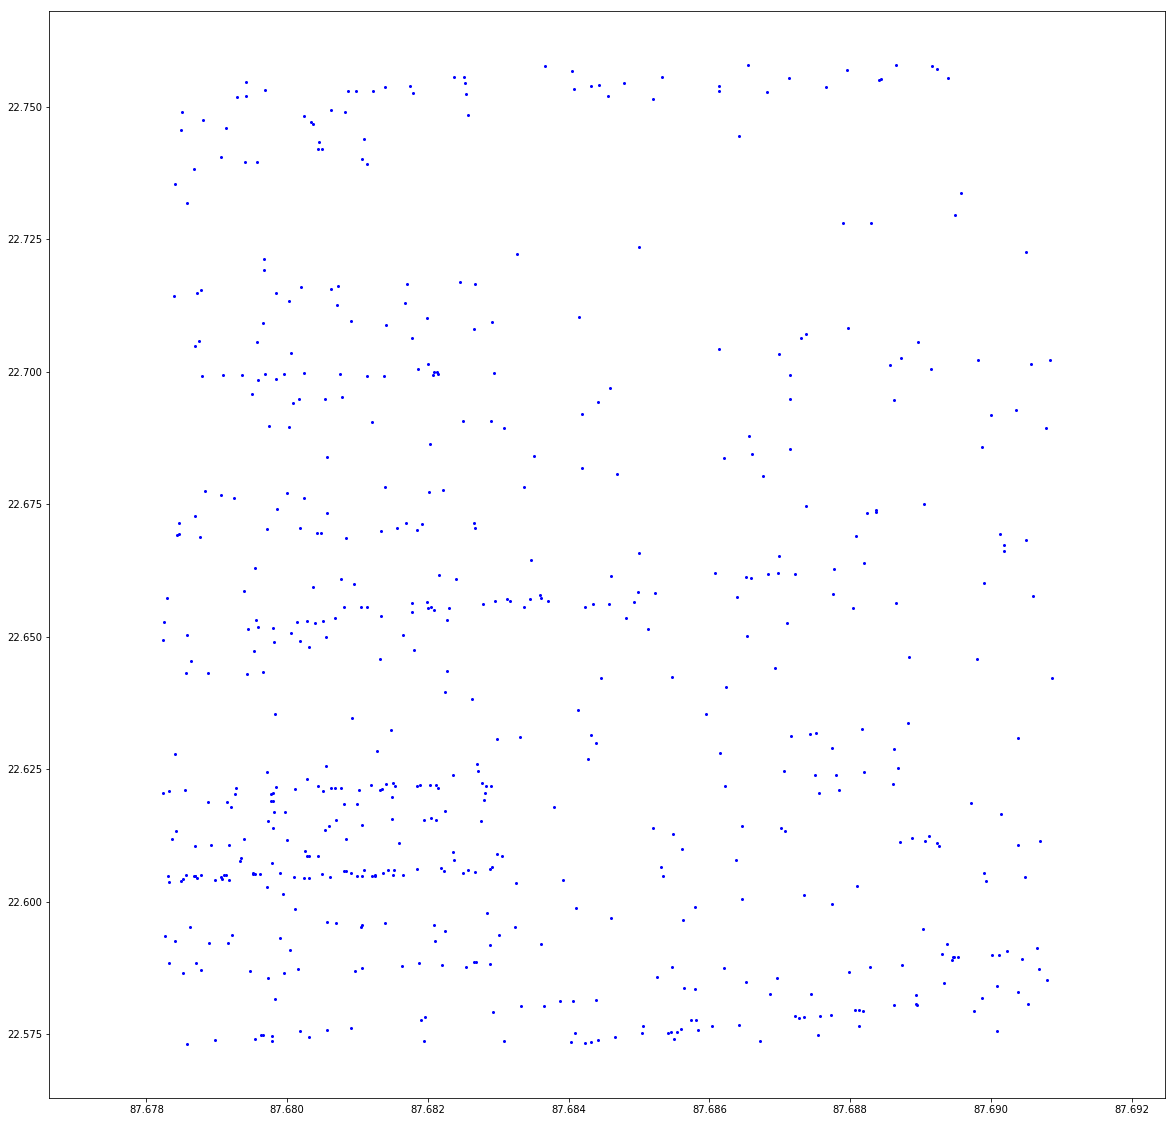

In [9]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20.0, 20.0)
plt.scatter(r1[:, 0], r1[:, 1],s=4,c="b", cmap=plt.cm.Spectral)
plt.show()

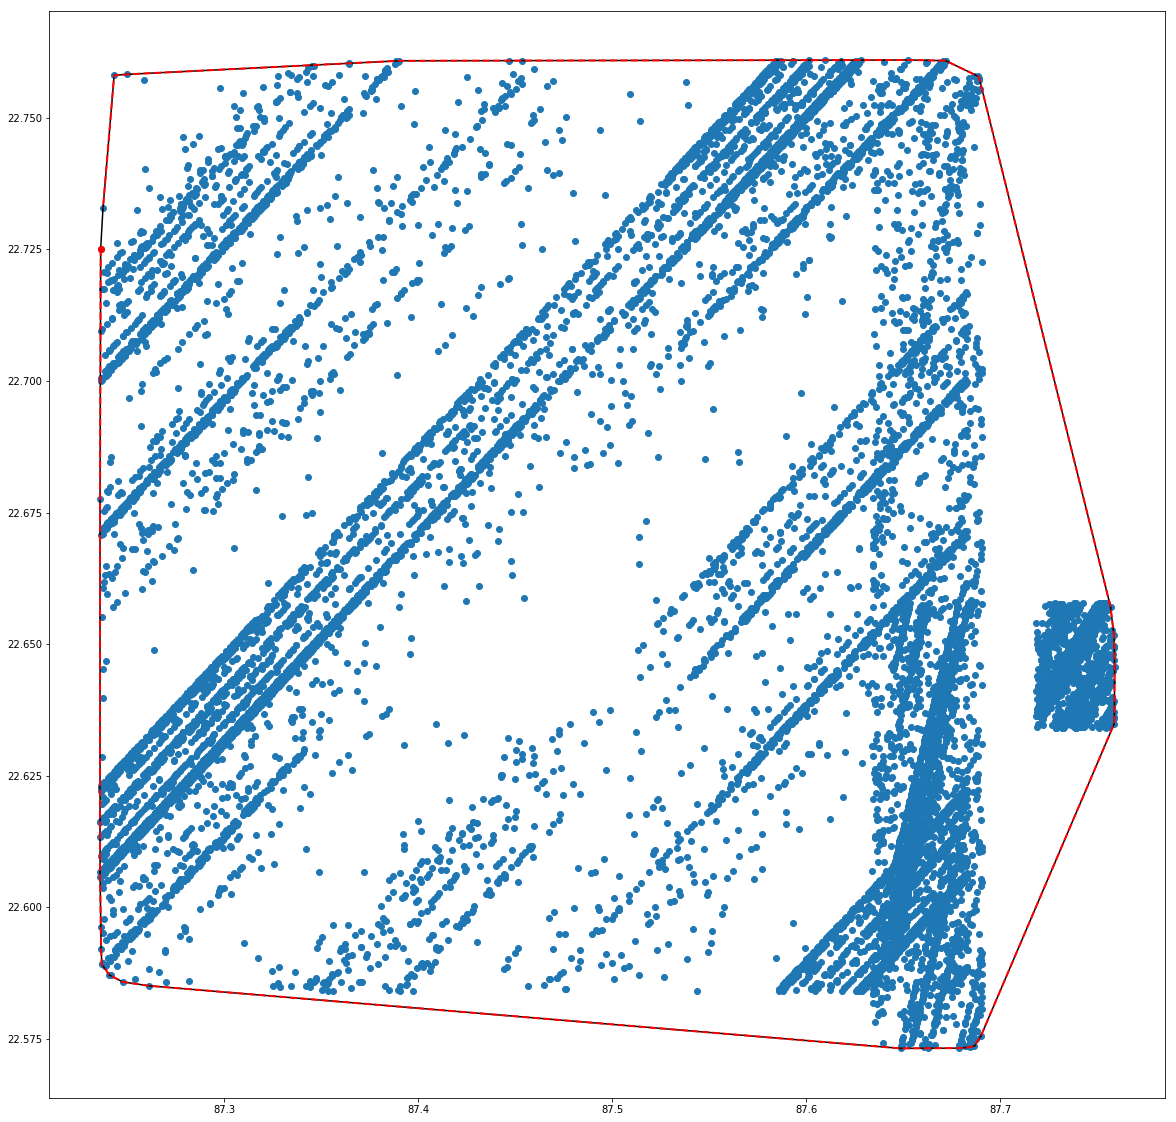

In [16]:
from scipy.spatial import ConvexHull
hull = ConvexHull(r1)
plt.plot(r1[:,0], r1[:,1], 'o')
for simplex in hull.simplices:
    plt.plot(r1[simplex, 0], r1[simplex, 1], 'k-')
plt.plot(r1[hull.vertices,0], r1[hull.vertices,1], 'r--', lw=2)
plt.plot(r1[hull.vertices[0],0], r1[hull.vertices[0],1], 'ro')
plt.show()

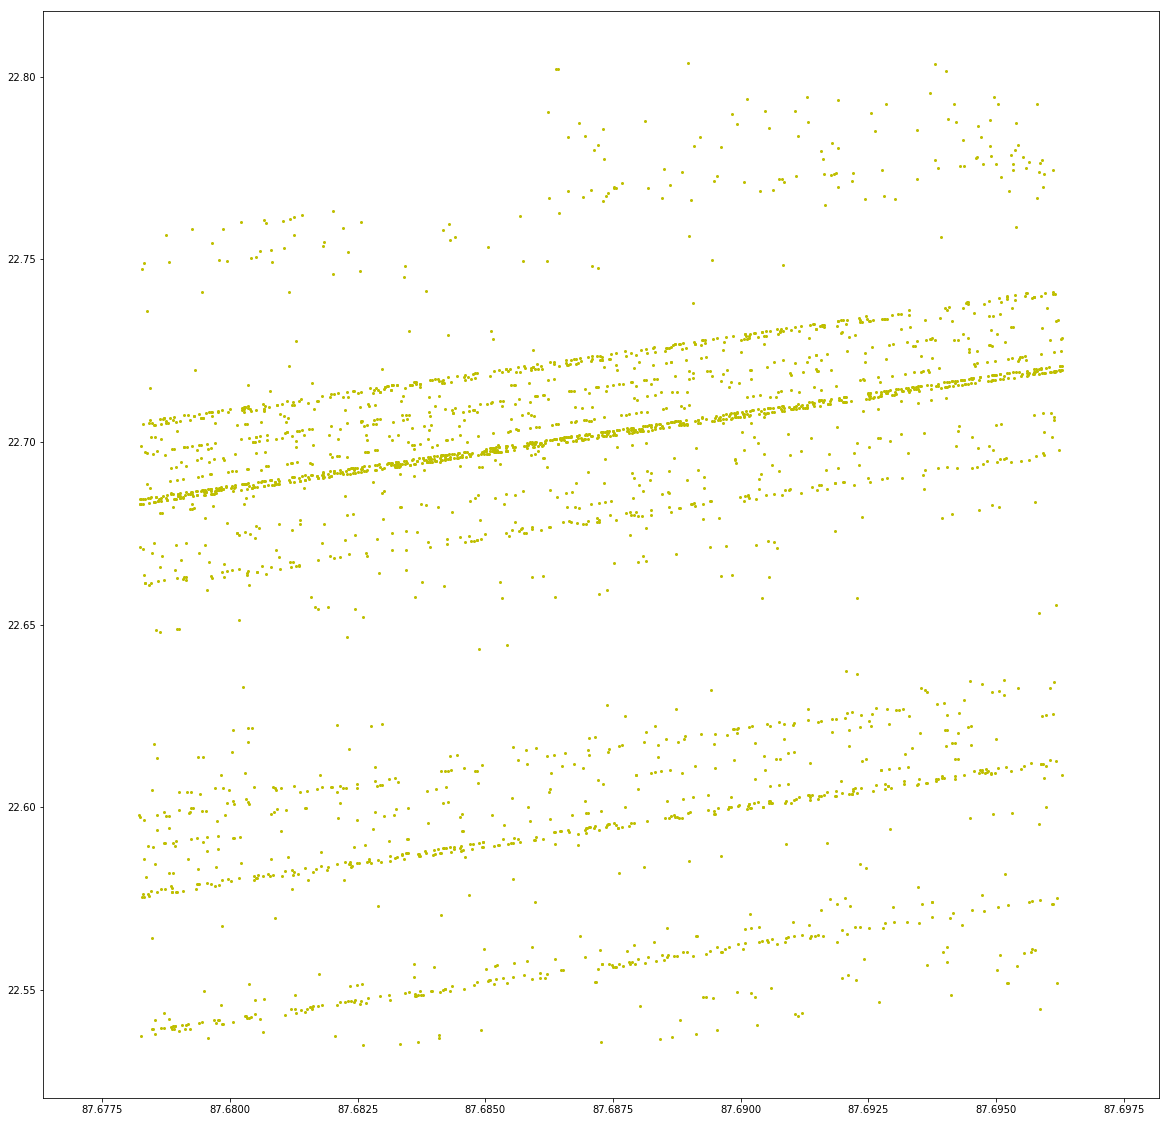

In [10]:
plt.scatter(r2[:, 0], r2[:, 1],s=4,c="y", cmap=plt.cm.Spectral)
plt.show()

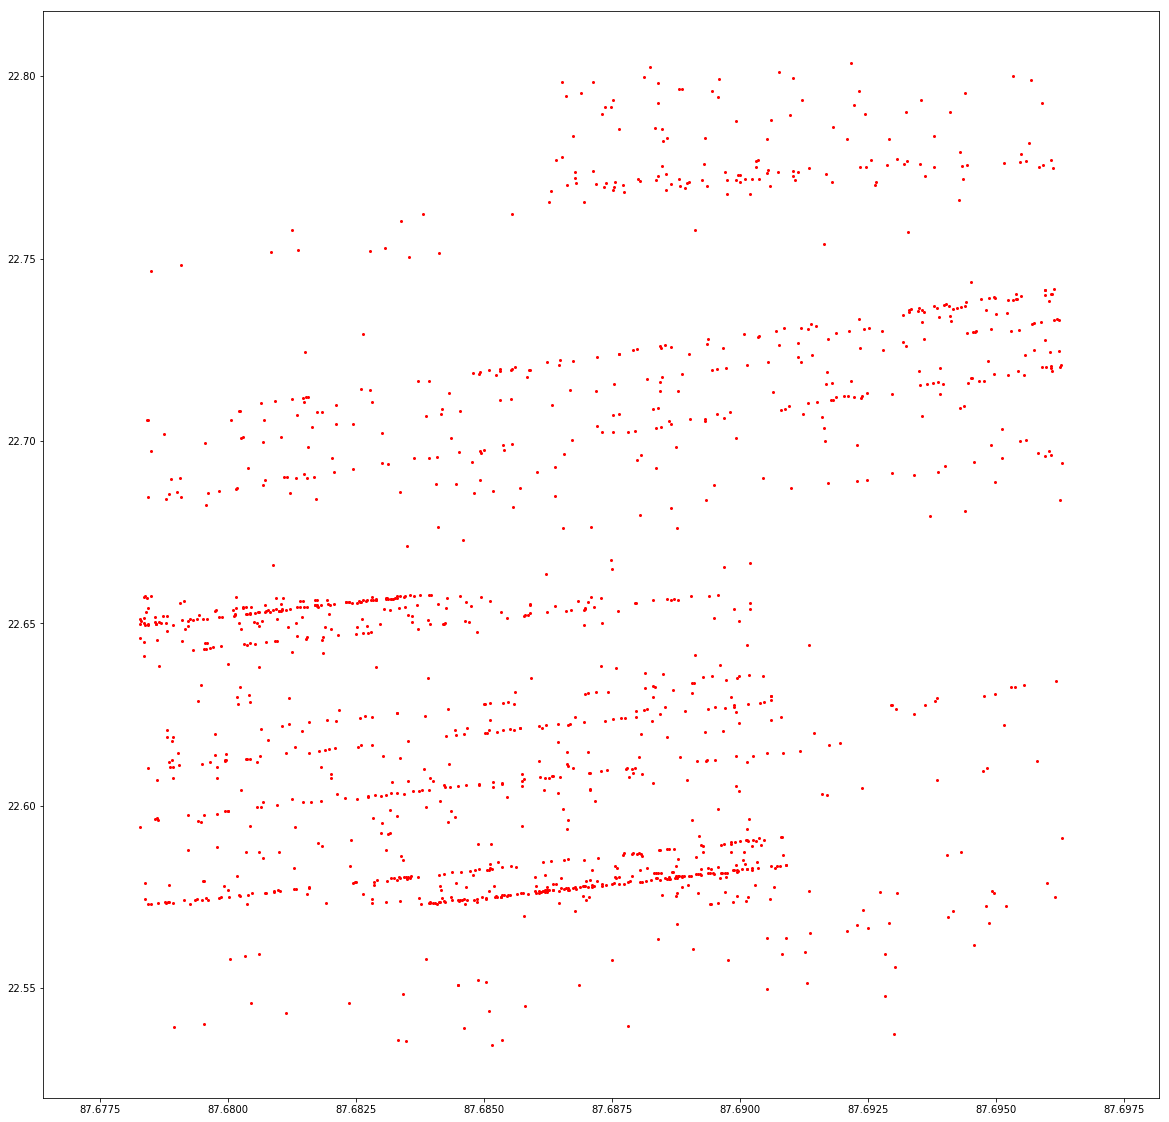

In [11]:
plt.scatter(r3[:, 0], r3[:, 1],s=4,c="r", cmap=plt.cm.Spectral)
plt.show()

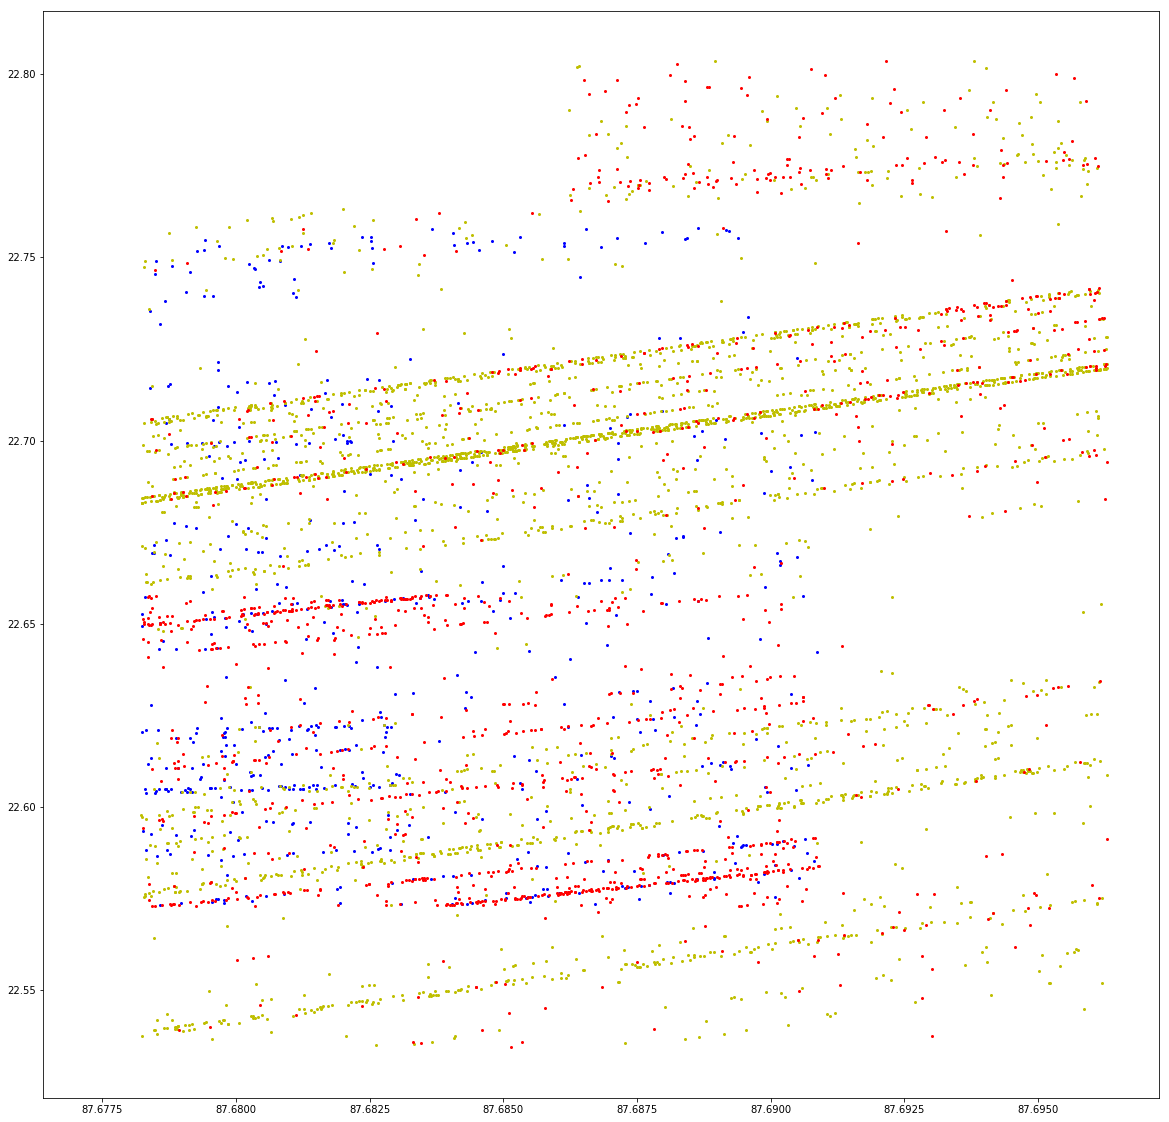

In [12]:
plt.scatter(r1[:, 0], r1[:, 1],s=4,c="b", cmap=plt.cm.Spectral)
plt.scatter(r2[:, 0], r2[:, 1],s=4,c="y", cmap=plt.cm.Spectral)
plt.scatter(r3[:, 0], r3[:, 1],s=4,c="r", cmap=plt.cm.Spectral)
plt.show()

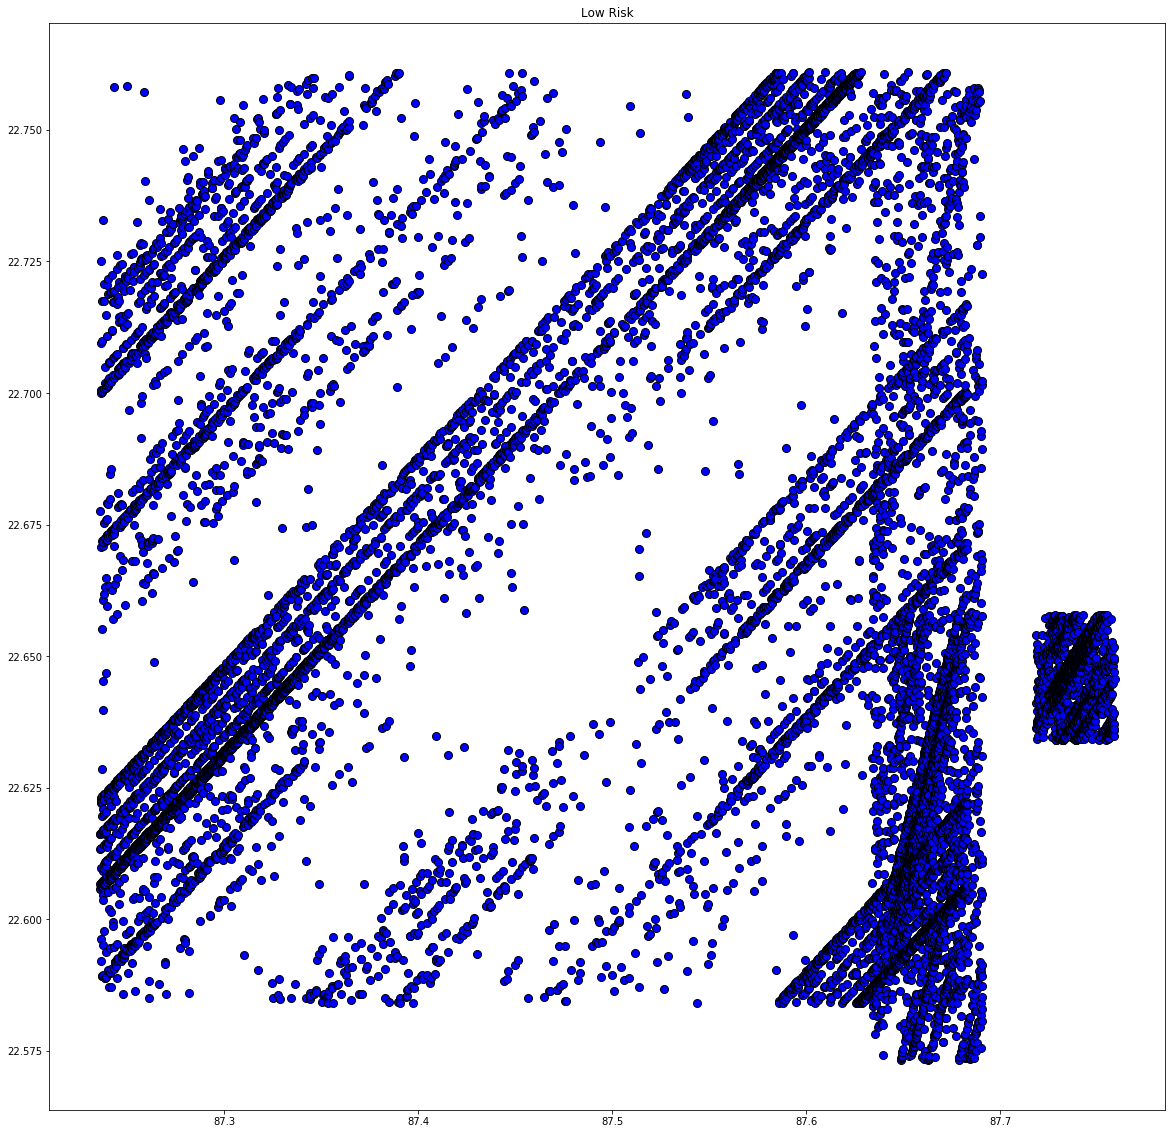

In [19]:
X=r1
#X = StandardScaler().fit_transform(X)
db = DBSCAN(eps=0.1, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor="b",
             markeredgecolor='k', markersize=8)

    xy = X[class_member_mask & ~core_samples_mask]
    #plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             #markeredgecolor='k', markersize=10)

plt.title('Low Risk')
plt.show()


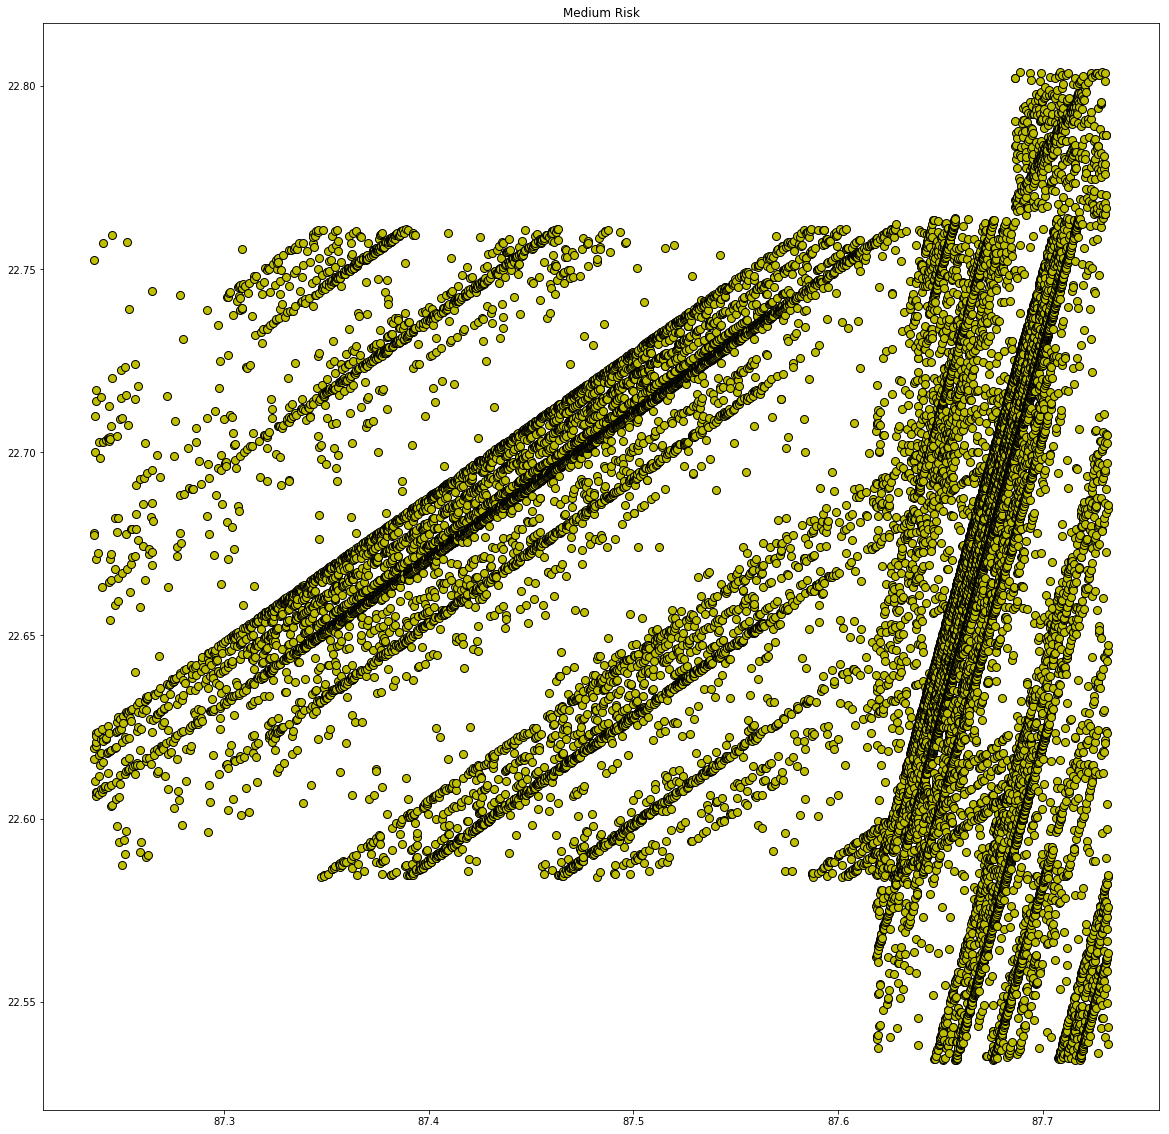

In [20]:
X=r2
#X = StandardScaler().fit_transform(X)
db = DBSCAN(eps=0.1, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor="y",
             markeredgecolor='k', markersize=8)

    xy = X[class_member_mask & ~core_samples_mask]
    #plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             #markeredgecolor='k', markersize=10)

plt.title('Medium Risk')
plt.show()


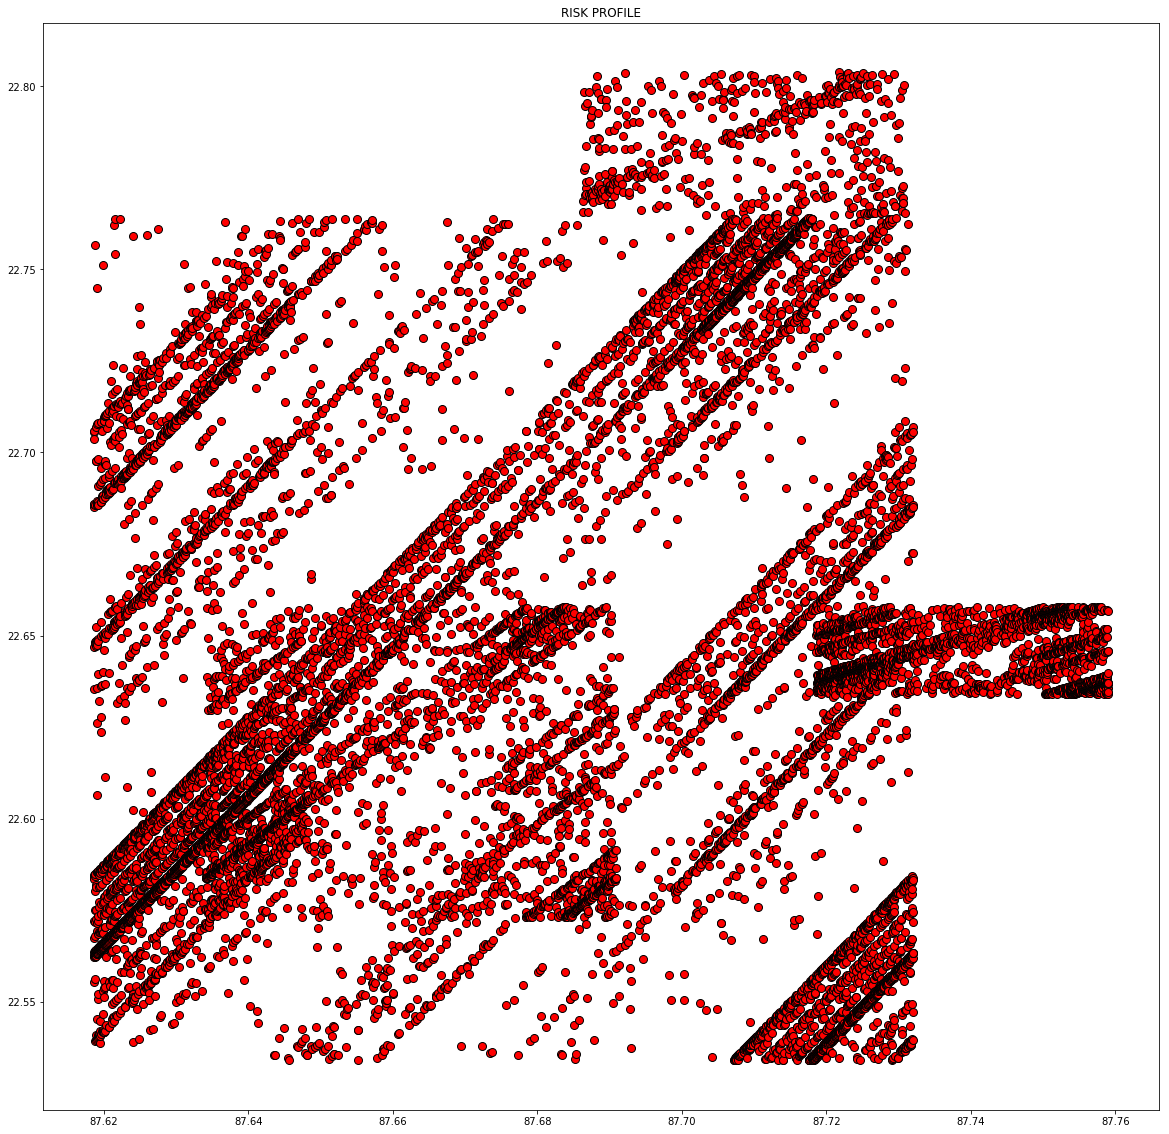

In [21]:
X=r3
#X = StandardScaler().fit_transform(X)
db = DBSCAN(eps=0.1, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    #if k == -1:
        # Black used for noise.
        #col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor="r",
             markeredgecolor='k', markersize=8)

    xy = X[class_member_mask & ~core_samples_mask]
    #plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             #markeredgecolor='k', markersize=10)

plt.title('RISK PROFILE')
plt.show()
